In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [2]:
fake_data = pd.read_csv('Fake.csv')
true_data = pd.read_csv('True.csv')

In [3]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_data['label'] = 'Fake'
true_data['label'] = 'Not Fake'

In [6]:
fake_data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [7]:
data = pd.concat([true_data, fake_data])


In [8]:
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Not Fake
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Not Fake
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Not Fake
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Not Fake
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Not Fake


In [9]:
data = data.drop(['title', 'date', 'subject'], axis=1)

In [10]:
data.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,Not Fake
1,WASHINGTON (Reuters) - Transgender people will...,Not Fake
2,WASHINGTON (Reuters) - The special counsel inv...,Not Fake
3,WASHINGTON (Reuters) - Trump campaign adviser ...,Not Fake
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,Not Fake


In [11]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [12]:
data.head()
#0-fake, 1-not fake

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [13]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [14]:
data.duplicated().sum()

6251

In [15]:
data = data.drop_duplicates(keep = 'first')

In [16]:
data.duplicated().sum()

0

In [17]:
data.shape

(38647, 2)

In [18]:
data['label'].value_counts()

1    21192
0    17455
Name: label, dtype: int64

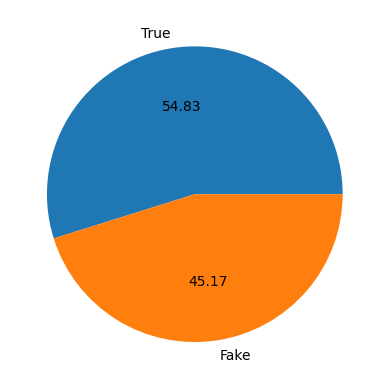

In [19]:
plt.pie(data['label'].value_counts(), labels=['True', 'Fake'], autopct="%0.2f")
plt.show()

# Preprocesssing

In [20]:
ps = PorterStemmer()

In [21]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [22]:
transform("hi hi hello!!! watching")

'hi hi hello watch'

In [23]:
data['text'] = data['text'].apply(transform)

In [25]:
data.to_csv("preprocess.csv")

## Model Building

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features=6000)

In [29]:
X = tfid.fit_transform(data['text']).toarray()

In [30]:
X

array([[0.        , 0.        , 0.05635998, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02209221, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [31]:
y = data['label'].values

In [32]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(X_train, y_train)
ypred2 = lr.predict(X_test)
print(accuracy_score(y_test, ypred2))

0.988745148771022


In [43]:
import pickle
pickle.dump(tfid, open('vectorizer.pkl','wb'))
pickle.dump(lr,open('model.pkl', 'wb'))

In [44]:
print(ypred2)

[0 1 1 ... 1 0 0]
